In [1]:
%pylab inline
from scipy.ndimage import gaussian_filter
import scipy.ndimage
import matplotlib.patches as patches

Populating the interactive namespace from numpy and matplotlib


## Void Slices

In [2]:
F0 = np.load('/home/arodriguez/BACCO/bias-voids/pruebas_fit/F0.npy')
F1 = np.load('/home/arodriguez/BACCO/bias-voids/pruebas_fit/F1.npy')
F2 = np.load('/home/arodriguez/BACCO/bias-voids/pruebas_fit/F2.npy')
F4 = np.load('/home/arodriguez/BACCO/bias-voids/pruebas_fit/F4.npy')

## Selecciono voids

In [3]:
v = np.loadtxt('/home/arodriguez/BACCO/bias-voids/voids/real_space/540/voids/voids_galpos_RedSample_5e-04_0_clean_-0.9.dat',
               skiprows = 1, delimiter = ',')

In [4]:
sel, = np.where((v[:,0]>400) & (v[:,0]<1000) &
               (v[:,1]>400) & (v[:,1]<1000) &
               (v[:,2]>400) & (v[:,2]<1000))

In [18]:
nid = sel[133]

x = v[nid,0]
y = v[nid,1]
z = v[nid,2]
r = v[nid,3]

abin = 1440/540
print('pos:',x,y,z,r)
print(x/abin,y/abin,z/abin)

pos: 476.0 676.0 622.6667 18.0
178.5 253.5 233.5000125


In [19]:
binx = int(x/abin)
biny = int(y/abin)
binz = int(z/abin)

print(binx,biny,binz)

178 253 233


# Centro fields en esas regiones

In [33]:
minx = binx - 50
maxx = binx + 50
miny = biny - 50
maxy = biny + 50
minz = binz - 13
maxz = binz + 13

field0 = np.mean(F0[minx:maxx,miny:maxy,minz:maxz], axis = 2)
field1 = np.mean(F1[minx:maxx,miny:maxy,minz:maxz], axis = 2)
field2 = np.mean(F2[minx:maxx,miny:maxy,minz:maxz], axis = 2)
field4 = np.mean(F4[minx:maxx,miny:maxy,minz:maxz], axis = 2)

In [34]:
# Aplicar un filtro gaussiano para suavizar el campo
# sigma controla el grado de suavizado, ajusta según sea necesario

# luego interpolo para aumentar resolucion

zoom_factor = 30

smoothed_f0 = gaussian_filter(field0, sigma=0.7)
f0 = scipy.ndimage.zoom(smoothed_f0, zoom_factor, order=3)  # order=3 para bicúbica

smoothed_f1 = gaussian_filter(field1, sigma=0.7)
f1 = scipy.ndimage.zoom(smoothed_f1, zoom_factor, order=3)  # order=3 para bicúbica

smoothed_f2 = gaussian_filter(field2, sigma=0.7)
f2 = scipy.ndimage.zoom(smoothed_f2, zoom_factor, order=3)  

smoothed_f4 = gaussian_filter(field4, sigma=0.7)
f4 = scipy.ndimage.zoom(smoothed_f4, zoom_factor, order=3)  

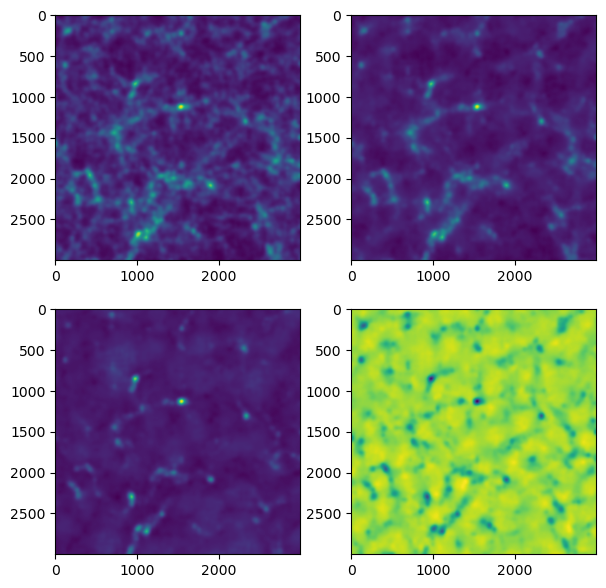

In [35]:
plt.figure(figsize=(7,7))

plt.subplot(221)
plt.imshow(f0)

plt.subplot(222)
plt.imshow(f1)

plt.subplot(223)
plt.imshow(f2)

plt.subplot(224)
plt.imshow(f4)

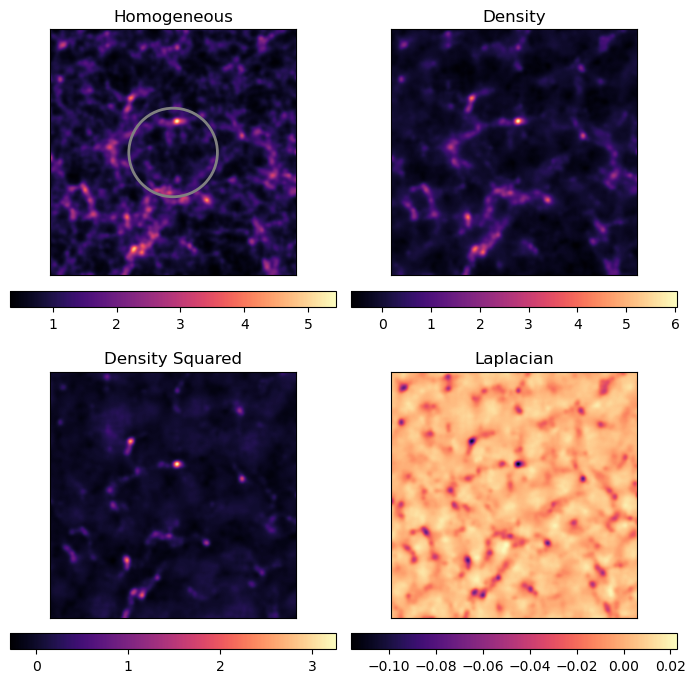

In [40]:
cmap = 'magma'

# Crear la figura y los subplots
plt.figure(figsize=(7, 7))

# Plot 1
ax1 = plt.subplot(221)
ax1.set_title('Homogeneous')
im1 = ax1.imshow(f0, cmap = cmap)
ax1.set_xticks([])  # Eliminar ticks del eje x
ax1.set_yticks([])  # Eliminar ticks del eje y

# Agregar el círculo al primer plot
center = (f0.shape[1] // 2, f0.shape[0] // 2)  # Centro del círculo
radio = 18*30  # Radio en celdas
circulo = patches.Circle(center, radio, fill=False, edgecolor='grey', linewidth=2)
ax1.add_patch(circulo)

plt.colorbar(im1, ax=ax1, orientation='horizontal', pad=0.05)

# Plot 2
ax2 = plt.subplot(222)
ax2.set_title('Density')
im2 = ax2.imshow(f1,cmap = cmap)
ax2.set_xticks([])  # Eliminar ticks del eje x
ax2.set_yticks([])  # Eliminar ticks del eje y
plt.colorbar(im2, ax=ax2, orientation='horizontal', pad=0.05)

# Plot 3
ax3 = plt.subplot(223)
ax3.set_title('Density Squared')
im3 = ax3.imshow(f2,cmap = cmap)
ax3.set_xticks([])  # Eliminar ticks del eje x
ax3.set_yticks([])  # Eliminar ticks del eje y
plt.colorbar(im3, ax=ax3, orientation='horizontal', pad=0.05)

# Plot 4
ax4 = plt.subplot(224)
ax4.set_title('Laplacian')
im4 = ax4.imshow(f4,cmap = cmap)
ax4.set_xticks([])  # Eliminar ticks del eje x
ax4.set_yticks([])  # Eliminar ticks del eje y
plt.colorbar(im4, ax=ax4, orientation='horizontal', pad=0.05)

# Ajustar el layout para que no se superpongan los elementos
plt.tight_layout()
plt.show()

In [94]:
np.max(f2)

16.517006